In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geometry3k/data-00000-of-00001.arrow


In [2]:
import os
from datasets import Dataset

def load_geometry3k_dataset():
    """
    Loads the Geometry3K dataset from the Arrow file in the current directory.

    :return: A Hugging Face Dataset object.
    """
    arrow_file_path = "/kaggle/input/geometry3k/data-00000-of-00001.arrow"

    # Load the dataset from the Arrow file
    dataset = Dataset.from_file(arrow_file_path)

    return dataset

def get_train_val_test_splits(dataset):
    """
    Splits the dataset into train, validation, and test sets.
    - Train: first 2101 samples
    - Validation: next 300 samples
    - Test: remaining samples
    """
    total_samples = dataset.num_rows
    train_end = min(2101, total_samples)
    val_end = min(train_end + 300, total_samples)

    train_dataset = dataset.select(range(0, train_end))
    val_dataset   = dataset.select(range(train_end, val_end))
    test_dataset  = dataset.select(range(val_end, total_samples))

    return {
        "train": train_dataset,
        "validation": val_dataset,
        "test": test_dataset
    }

# Load and split the dataset
dataset = load_geometry3k_dataset()
dataset_splits = get_train_val_test_splits(dataset)

# Show basic info
print("Train samples:", len(dataset_splits["train"]))
print("Validation samples:", len(dataset_splits["validation"]))
print("Test samples:", len(dataset_splits["test"]))

# Display the first training sample
print(dataset_splits["train"][0])


Train samples: 2101
Validation samples: 300
Test samples: 501
{'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=648x405 at 0x7E68A0339360>], 'problem': '<image>Find $x$.', 'answer': '2', 'id': 84, 'choices': ['1', '2', '3', '4'], 'ground_truth': 'B'}


Dataset size: 2101 samples
Dataset features: ['images', 'problem', 'answer', 'id', 'choices', 'ground_truth']
Missing values per feature: {'images': 0, 'problem': 0, 'answer': 0, 'id': 0, 'choices': 0, 'ground_truth': 0}
Answer distribution: Counter({'B': 660, 'C': 598, 'A': 454, 'D': 389})
Average number of choices: 4.00
Average problem text length: 57.72 characters
Min problem text length: 13 characters
Max problem text length: 248 characters
Unique image dimensions: {(313, 200), (285, 281), (403, 273), (469, 447), (603, 298), (709, 465), (512, 445), (460, 255), (336, 219), (377, 220), (349, 158), (346, 269), (541, 328), (182, 246), (276, 210), (355, 174), (339, 229), (490, 398), (563, 468), (456, 405), (210, 200), (330, 302), (571, 328), (417, 270), (429, 244), (628, 453), (326, 268), (398, 256), (630, 270), (424, 430), (177, 144), (344, 321), (238, 160), (363, 191), (428, 400), (266, 258), (393, 299), (290, 206), (347, 188), (908, 255), (358, 197), (698, 382), (601, 449), (186, 270

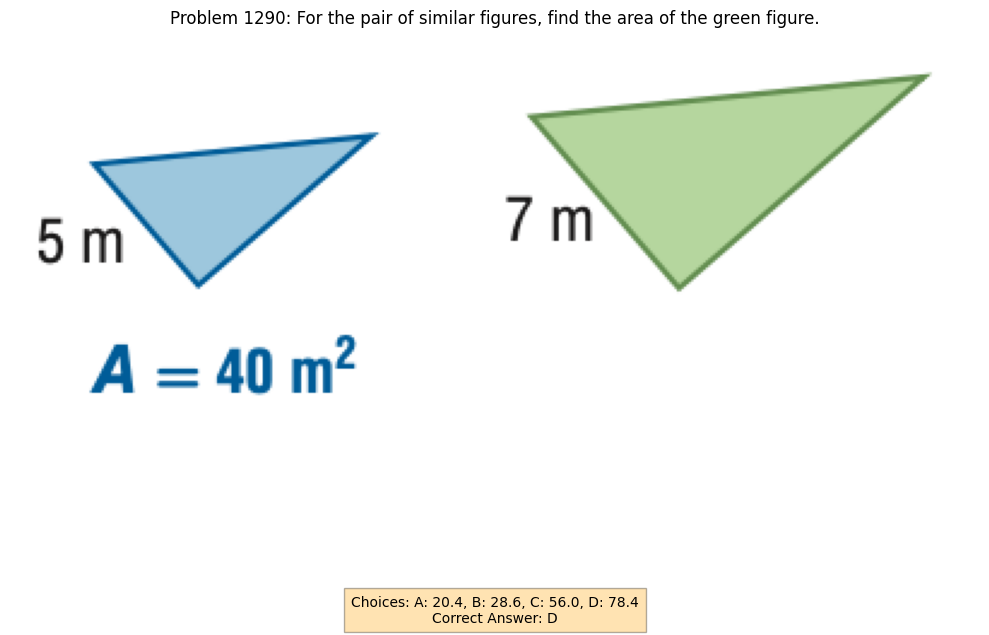

Sample ID: 1290
Problem: <image>For the pair of similar figures, find the area of the green figure.
Choices: ['20.4', '28.6', '56.0', '78.4']
Correct Answer: D (78.4)
--------------------------------------------------


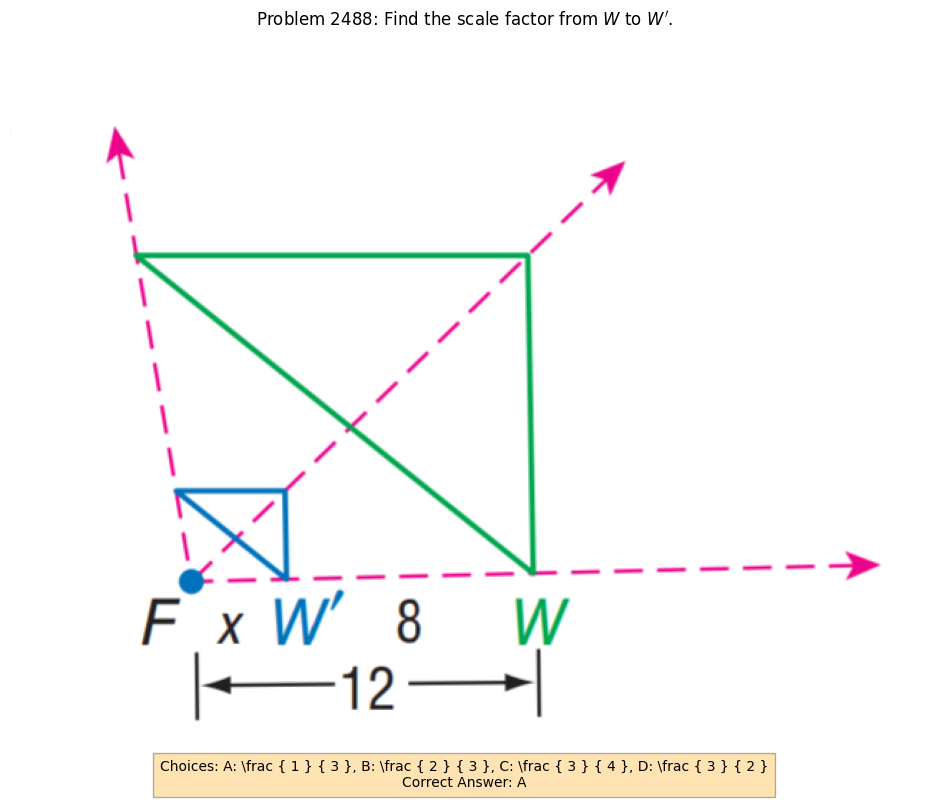

Sample ID: 2488
Problem: <image>Find the scale factor from $W$ to $W'$.
Choices: ['\\frac { 1 } { 3 }', '\\frac { 2 } { 3 }', '\\frac { 3 } { 4 }', '\\frac { 3 } { 2 }']
Correct Answer: A (\frac { 1 } { 3 })
--------------------------------------------------


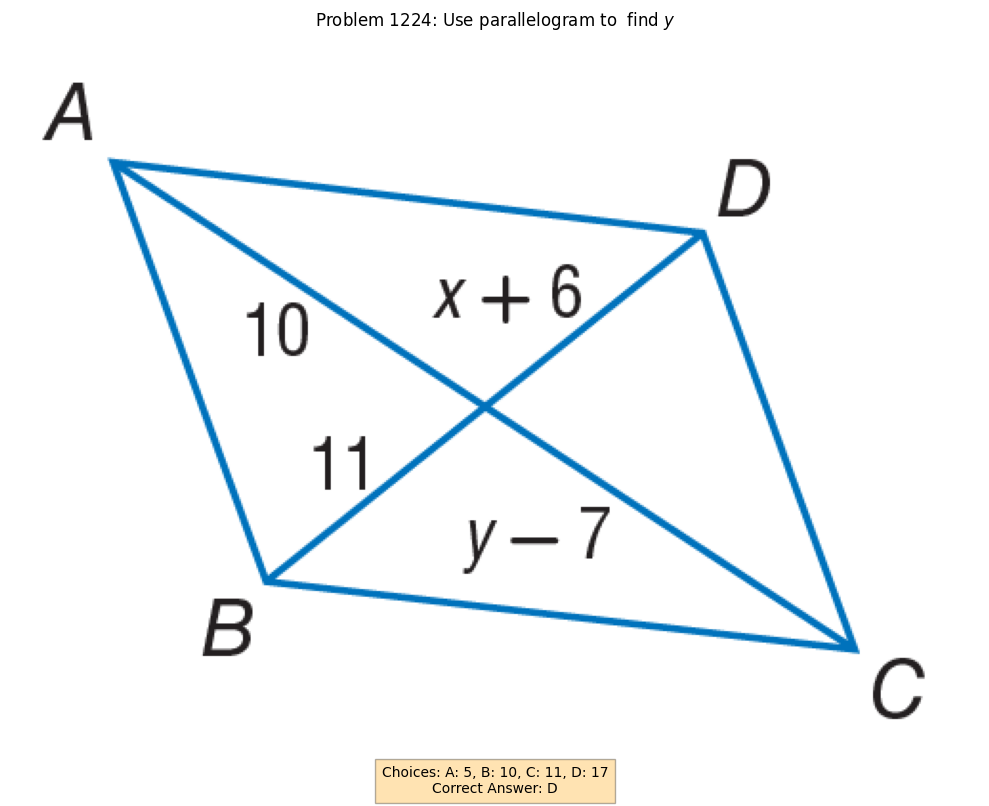

Sample ID: 1224
Problem: <image>Use parallelogram to  find $y$
Choices: ['5', '10', '11', '17']
Correct Answer: D (17)
--------------------------------------------------


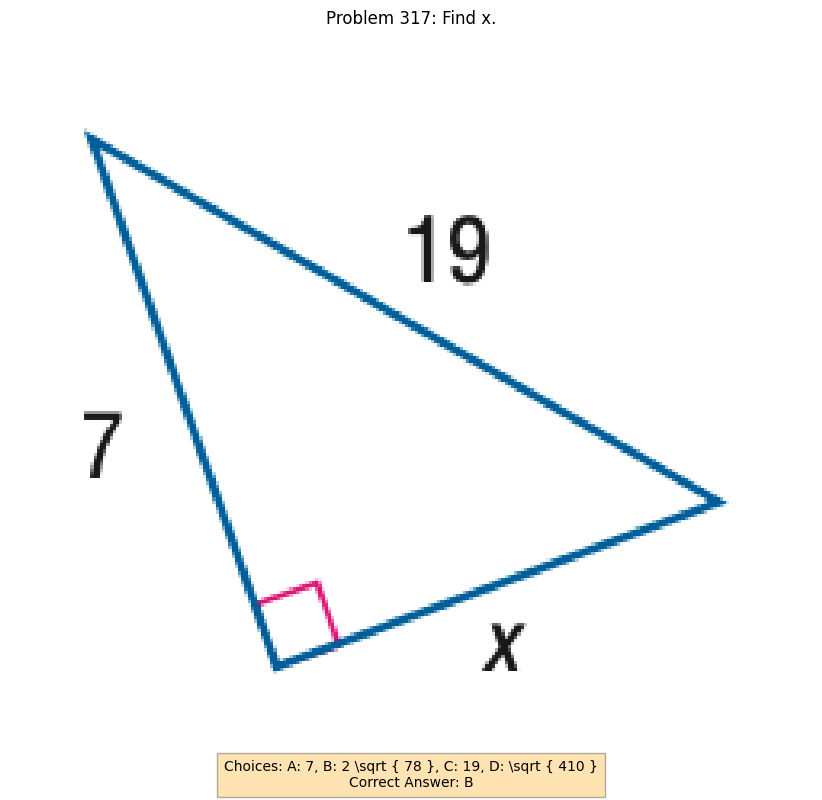

Sample ID: 317
Problem: <image>Find x.
Choices: ['7', '2 \\sqrt { 78 }', '19', '\\sqrt { 410 }']
Correct Answer: B (2 \sqrt { 78 })
--------------------------------------------------


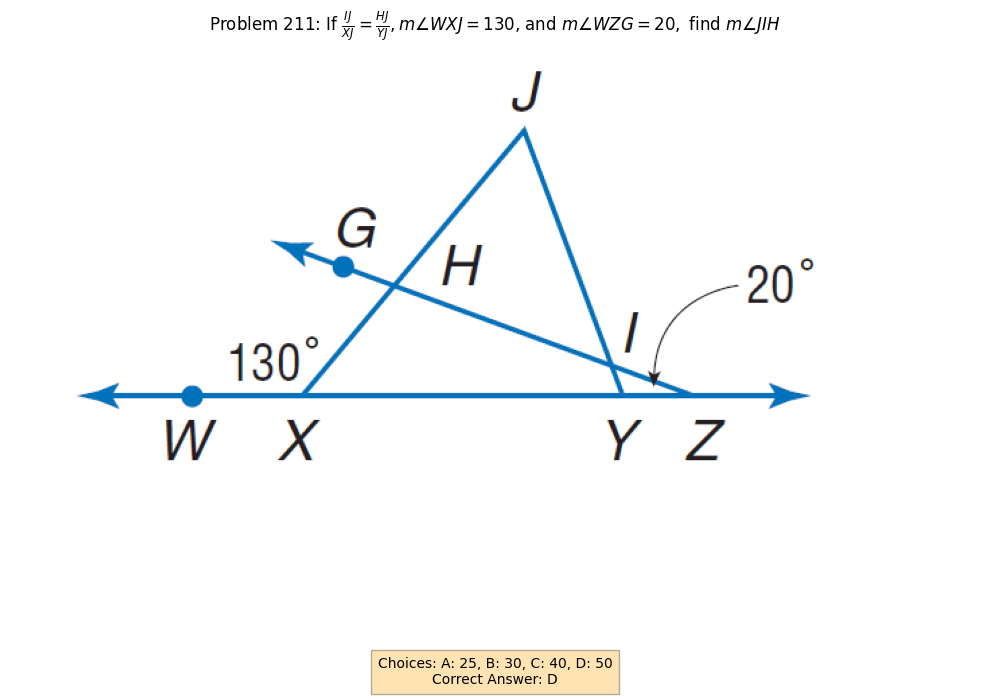

Sample ID: 211
Problem: <image>If $\frac{I J}{X J}=\frac{HJ}{YJ}, m \angle W X J=130$, and $m \angle WZG=20,$ find $m \angle JIH$
Choices: ['25', '30', '40', '50']
Correct Answer: D (50)
--------------------------------------------------
Samples without images: 0
Samples with <image> tag in problem text: 2101


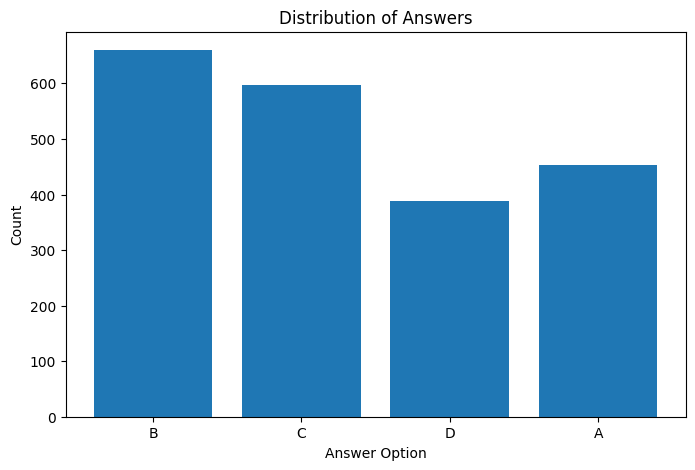

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter

def explore_dataset(dataset):
    """
    Perform exploratory data analysis on the geometry dataset.
    """
    # 1. Basic dataset information
    print(f"Dataset size: {len(dataset)} samples")
    print(f"Dataset features: {list(dataset[0].keys())}")
    
    # 2. Check for missing values
    missing_values = {key: sum(1 for item in dataset if key not in item) for key in dataset[0].keys()}
    print(f"Missing values per feature: {missing_values}")
    
    # 3. Distribution of answer classes
    answers = [sample['ground_truth'] for sample in dataset]
    answer_counts = Counter(answers)
    print(f"Answer distribution: {answer_counts}")
    
    # 4. Average number of choices
    avg_choices = sum(len(sample['choices']) for sample in dataset) / len(dataset)
    print(f"Average number of choices: {avg_choices:.2f}")
    
    # 5. Analyze text length in problems
    text_lengths = [len(sample['problem']) for sample in dataset]
    print(f"Average problem text length: {sum(text_lengths)/len(text_lengths):.2f} characters")
    print(f"Min problem text length: {min(text_lengths)} characters")
    print(f"Max problem text length: {max(text_lengths)} characters")
    
    # 6. Check image dimensions
    image_dimensions = [(img.width, img.height) for sample in dataset for img in sample['images']]
    unique_dimensions = set(image_dimensions)
    print(f"Unique image dimensions: {unique_dimensions}")
    
    # 7. Visualize a few random samples
    visualize_random_samples(dataset, n=5)
    
    # 8. Check if all samples have images
    samples_without_images = sum(1 for sample in dataset if not sample['images'])
    print(f"Samples without images: {samples_without_images}")
    
    # 9. Check text-image relationship
    has_image_tag = sum(1 for sample in dataset if '<image>' in sample['problem'])
    print(f"Samples with <image> tag in problem text: {has_image_tag}")
    
    return {
        "answer_distribution": answer_counts,
        "unique_image_dimensions": unique_dimensions,
        "text_stats": {
            "avg_length": sum(text_lengths)/len(text_lengths),
            "min_length": min(text_lengths),
            "max_length": max(text_lengths)
        }
    }

def visualize_random_samples(dataset, n=5):
    """
    Visualize n random samples from the dataset to understand its structure.
    """
    random_indices = random.sample(range(len(dataset)), min(n, len(dataset)))
    
    for i, idx in enumerate(random_indices):
        sample = dataset[idx]
        
        fig, ax = plt.subplots(figsize=(10, 8))
        # Display the image
        if sample['images']:
            ax.imshow(sample['images'][0])
            ax.axis('off')
            
        # Add problem text and choices as title and caption
        problem_text = sample['problem'].replace('<image>', '')
        choice_text = ", ".join([f"{chr(65+i)}: {choice}" for i, choice in enumerate(sample['choices'])])
        correct_answer = sample['ground_truth']
        
        plt.title(f"Problem {sample['id']}: {problem_text}", fontsize=12)
        plt.figtext(0.5, 0.01, f"Choices: {choice_text}\nCorrect Answer: {correct_answer}", 
                   ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.3, "pad":5})
        
        plt.tight_layout()
        plt.show()
        
        # Print additional information
        print(f"Sample ID: {sample['id']}")
        print(f"Problem: {sample['problem']}")
        print(f"Choices: {sample['choices']}")
        print(f"Correct Answer: {sample['ground_truth']} ({sample['answer']})")
        print("-" * 50)

# Run the exploration on training set
exploration_results = explore_dataset(dataset_splits["train"])

# Visualize answer distribution
plt.figure(figsize=(8, 5))
answer_dist = exploration_results["answer_distribution"]
plt.bar(answer_dist.keys(), answer_dist.values())
plt.title("Distribution of Answers")
plt.xlabel("Answer Option")
plt.ylabel("Count")
plt.show()

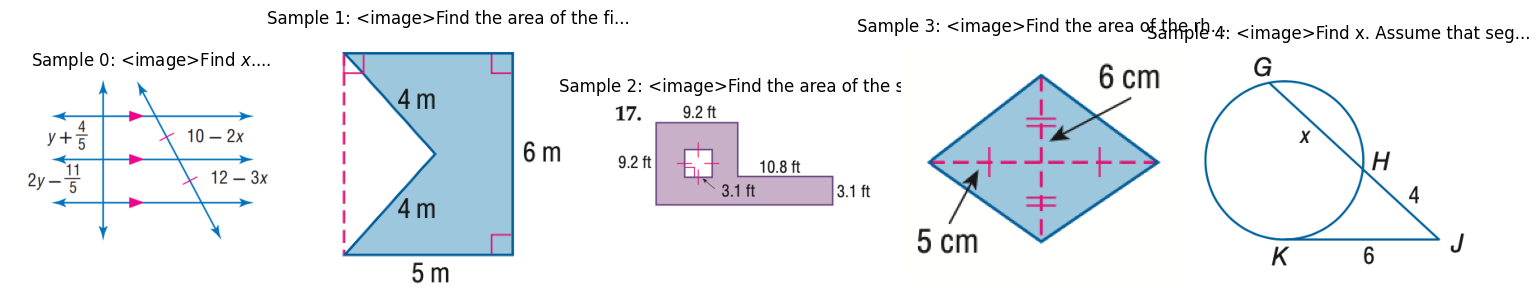

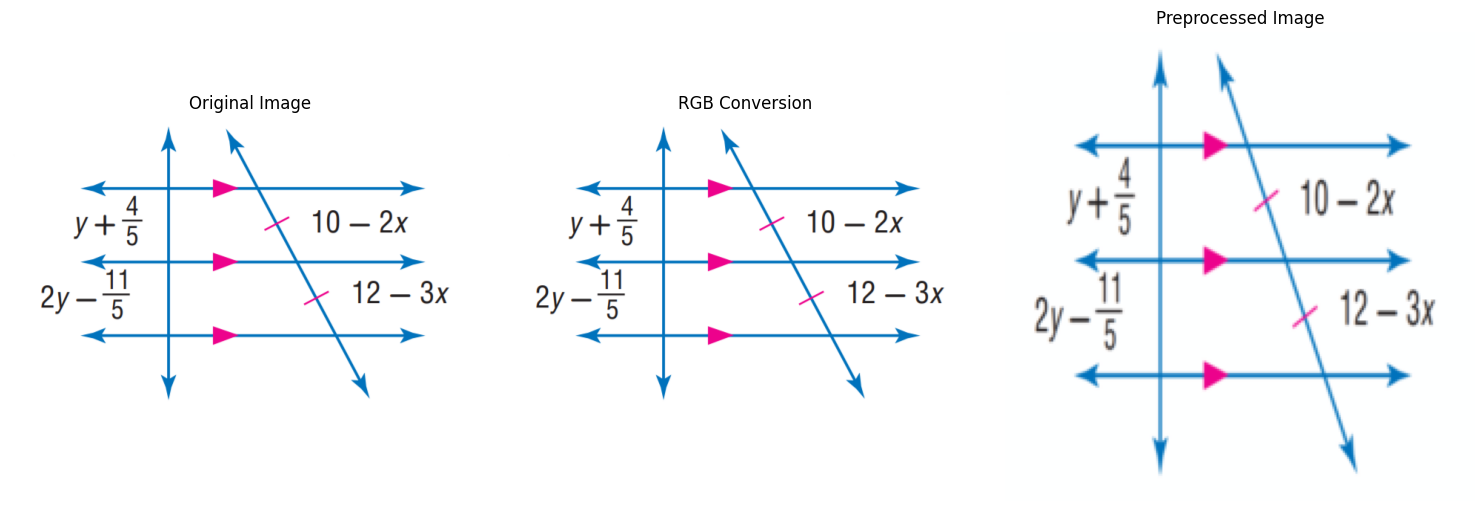

Preprocessed tensor shape: torch.Size([3, 224, 224])
Testing data loader...
Batch shapes:
  image: torch.Size([5, 3, 224, 224])
  problem_text: <class 'list'>
  choices: <class 'list'>
  label: torch.Size([5])
  id: torch.Size([5])


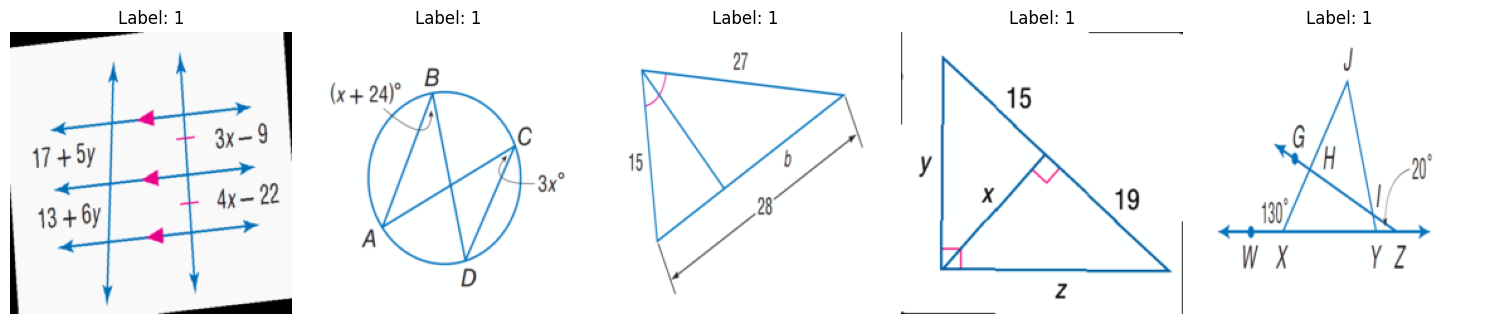

Step 2 (Image Preprocessing) implementation complete!


In [4]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

class GeometryImagePreprocessor:
    def __init__(self, target_size=(224, 224), augment=False):
        """
        Initialize the image preprocessor with configuration options.
        
        Args:
            target_size (tuple): Target size for resizing images (width, height)
            augment (bool): Whether to apply data augmentation
        """
        self.target_size = target_size
        self.augment = augment
        
        # Define the base transformation pipeline for normalization
        self.base_transform = transforms.Compose([
            transforms.Resize(target_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                std=[0.229, 0.224, 0.225])
        ])
        
        # Define augmentation pipeline if enabled
        if augment:
            self.augment_transform = transforms.Compose([
                transforms.RandomRotation(5),  # Slight rotation (geometry-aware)
                transforms.ColorJitter(brightness=0.1, contrast=0.1),
                transforms.Resize(target_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                    std=[0.229, 0.224, 0.225])
            ])
    
    def preprocess(self, image):
        """
        Preprocess a single image.
        
        Args:
            image (PIL.Image): Input image
        
        Returns:
            torch.Tensor: Preprocessed image tensor
        """
        # Convert RGBA to RGB if needed
        if image.mode == 'RGBA':
            # Create a white background
            background = Image.new('RGB', image.size, (255, 255, 255))
            # Paste the image on the background using alpha as mask
            background.paste(image, mask=image.split()[3])
            image = background
        elif image.mode != 'RGB':
            image = image.convert('RGB')
        
        # Apply transformations
        if self.augment and np.random.random() > 0.5:
            return self.augment_transform(image)
        else:
            return self.base_transform(image)

# Display some sample images from the dataset
def display_sample_images(dataset, num_samples=3):
    """
    Display a few sample images from the dataset.
    """
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    
    for i in range(num_samples):
        if i < len(dataset):
            sample = dataset[i]
            if 'images' in sample and sample['images']:
                image = sample['images'][0]
                axes[i].imshow(image)
                axes[i].set_title(f"Sample {i}: {sample['problem'][:30]}...")
                axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Create the image processor
image_processor = GeometryImagePreprocessor(target_size=(224, 224), augment=True)

# Display some sample images
display_sample_images(dataset_splits["train"], num_samples=5)

# Demonstrate preprocessing on a single image
def demonstrate_preprocessing(dataset, image_processor):
    """
    Demonstrate preprocessing on a single image from the dataset.
    """
    sample = dataset[0]
    image = sample['images'][0]
    
    # Display original
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Display RGB conversion
    if image.mode == 'RGBA':
        background = Image.new('RGB', image.size, (255, 255, 255))
        background.paste(image, mask=image.split()[3])
        rgb_image = background
    else:
        rgb_image = image.convert('RGB')
    
    plt.subplot(1, 3, 2)
    plt.imshow(rgb_image)
    plt.title("RGB Conversion")
    plt.axis('off')
    
    # Display preprocessed (convert back from tensor for visualization)
    processed = image_processor.preprocess(image)
    processed_np = processed.permute(1, 2, 0).numpy()
    processed_np = processed_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    processed_np = np.clip(processed_np, 0, 1)
    
    plt.subplot(1, 3, 3)
    plt.imshow(processed_np)
    plt.title("Preprocessed Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return processed

# Demonstrate preprocessing
preprocessed_tensor = demonstrate_preprocessing(dataset_splits["train"], image_processor)
print("Preprocessed tensor shape:", preprocessed_tensor.shape)

# Create a PyTorch dataset for geometry problems
class GeometryDataset(Dataset):
    def __init__(self, dataset, image_processor):
        """
        Create a PyTorch dataset for geometry problems.
        
        Args:
            dataset: The original dataset
            image_processor: The image preprocessor
        """
        self.dataset = dataset
        self.image_processor = image_processor
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        try:
            sample = self.dataset[idx]
            
            # Process image
            if sample['images'] and len(sample['images']) > 0:
                image = sample['images'][0]
                image_tensor = self.image_processor.preprocess(image)
            else:
                # Create an empty tensor if no image is available
                image_tensor = torch.zeros((3, *self.image_processor.target_size))
            
            # Process problem text
            problem_text = sample['problem'].replace('<image>', '')
            
            # Process answer
            choices = sample['choices']
            correct_idx = ord(sample['ground_truth']) - ord('A')  # Convert 'A', 'B', 'C', 'D' to 0, 1, 2, 3
            
            return {
                'image': image_tensor,
                'problem_text': problem_text,
                'choices': choices,
                'label': correct_idx,
                'id': sample['id']
            }
        except Exception as e:
            print(f"Error processing sample {idx}: {str(e)}")
            # Return a default sample to prevent the DataLoader from crashing
            return {
                'image': torch.zeros((3, *self.image_processor.target_size)),
                'problem_text': "",
                'choices': [],
                'label': 0,
                'id': -1
            }

# Create dataset instances
train_dataset = GeometryDataset(dataset_splits["train"], image_processor)
val_dataset = GeometryDataset(dataset_splits["validation"], image_processor)

# Create data loaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=16, 
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=16, 
    shuffle=False,
    num_workers=2
)

# Test the data loader
def test_data_loader(data_loader):
    """
    Test the data loader by extracting a batch.
    """
    try:
        # Get a single batch
        for batch in data_loader:
            print("Batch shapes:")
            for key, value in batch.items():
                if isinstance(value, torch.Tensor):
                    print(f"  {key}: {value.shape}")
                else:
                    print(f"  {key}: {type(value)}")
            
            # Show a few images from the batch
            images = batch['image']
            labels = batch['label']
            
            plt.figure(figsize=(15, 5))
            for i in range(min(5, len(images))):
                plt.subplot(1, 5, i+1)
                # Convert tensor to image for visualization
                img = images[i].permute(1, 2, 0).numpy()
                img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                img = np.clip(img, 0, 1)
                
                plt.imshow(img)
                plt.title(f"Label: {labels[i].item()}")
                plt.axis('off')
            
            plt.tight_layout()
            plt.show()
            break
            
    except Exception as e:
        print(f"Error testing data loader: {str(e)}")

# Test the train loader with a small batch size
small_train_loader = DataLoader(
    train_dataset, 
    batch_size=5, 
    shuffle=True,
    num_workers=0  # Use 0 for debugging
)

print("Testing data loader...")
test_data_loader(small_train_loader)

print("Step 2 (Image Preprocessing) implementation complete!")

In [5]:
import re
import torch
from transformers import AutoTokenizer
import nltk
from nltk.tokenize import word_tokenize
import string

class GeometryTextPreprocessor:
    def __init__(self, max_length=128, tokenizer_name="bert-base-uncased"):
        """
        Initialize the text preprocessor with configuration options.
        
        Args:
            max_length (int): Maximum sequence length for tokenization
            tokenizer_name (str): Name of the pretrained tokenizer to use
        """
        self.max_length = max_length
        
        # Load the tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        
        # Download NLTK resources if needed
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            nltk.download('punkt')
        
        # Common math symbols to keep during preprocessing
        self.math_symbols = set(['=', '+', '-', '*', '/', '^', '<', '>', '≤', '≥', '≠', 
                              '∫', '∑', '∏', '√', '∞', '∂', '∇', '∆', 'π', 'θ', 'α', 
                              '°', '∠', '△', '□', '∥', '⊥', '≅', '~', '≈'])
    
    def clean_text(self, text):
        """
        Clean and normalize the text while preserving mathematical notation.
        
        Args:
            text (str): Input text
        
        Returns:
            str: Cleaned text
        """
        # Replace <image> tag
        text = text.replace('<image>', '')
        
        # Extract and preserve mathematical expressions (e.g., equations in parentheses or with equal signs)
        # This is a simplified approach - a more robust solution might use regex patterns specific to math notation
        math_parts = []
        
        # Preserve expressions with parentheses, brackets or equal signs
        for pattern in [r'\([^)]+\)', r'\[[^\]]+\]', r'[^=]+=+[^=]+']:
            math_expressions = re.findall(pattern, text)
            for expr in math_expressions:
                placeholder = f" MATHEXPR{len(math_parts)} "
                text = text.replace(expr, placeholder)
                math_parts.append(expr)
        
        # Tokenize the text while preserving certain punctuation
        tokens = word_tokenize(text)
        
        # Process tokens to handle math symbols
        processed_tokens = []
        for token in tokens:
            # Keep math symbols
            if token in self.math_symbols:
                processed_tokens.append(token)
            # Remove punctuation except for those in math_symbols
            elif all(char in string.punctuation for char in token) and not any(char in self.math_symbols for char in token):
                continue
            # Keep alphanumeric tokens
            else:
                processed_tokens.append(token.lower())
        
        # Reconstruct the text
        cleaned_text = ' '.join(processed_tokens)
        
        # Restore math expressions
        for i, expr in enumerate(math_parts):
            cleaned_text = cleaned_text.replace(f"mathexpr{i}", expr)
        
        return cleaned_text
    
    def preprocess(self, text):
        """
        Preprocess and tokenize the text.
        
        Args:
            text (str): Input text
        
        Returns:
            dict: Tokenized text with attention masks
        """
        # Clean the text
        cleaned_text = self.clean_text(text)
        
        # Tokenize
        encoding = self.tokenizer(
            cleaned_text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'raw_text': cleaned_text
        }

# Create an OCR extractor class for extracting text from images (optional)
class GeometryOCRExtractor:
    def __init__(self, use_math_ocr=True):
        """
        Initialize OCR extractor for math expressions.
        
        Args:
            use_math_ocr (bool): Whether to use specialized math OCR
        """
        self.use_math_ocr = use_math_ocr
        
        # Note: In a real implementation, you would initialize OCR engines here
        # Examples might include:
        # - pytesseract for general OCR
        # - A specialized math OCR engine (like Mathpix) for equation extraction
        
        print("Note: OCR functionality is a placeholder. In a real implementation, you would need:")
        print("1. pytesseract or similar for general text OCR")
        print("2. A specialized math OCR system for equations (e.g., Mathpix API)")
    
    def extract_text(self, image):
        """
        Extract text from an image.
        
        Args:
            image (PIL.Image): Input image
            
        Returns:
            str: Extracted text
        """
        # This is a placeholder. In a real implementation, you would:
        # 1. Perform general OCR on the image
        # 2. If use_math_ocr is True, also extract math expressions
        
        # For the competition, if the problem text is already provided in the dataset,
        # you may not need actual OCR implementation
        
        return "[OCR PLACEHOLDER: This would extract text from the image in a real implementation]"

# Enhance the GeometryDataset class to include text preprocessing
class EnhancedGeometryDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, image_processor, text_processor, use_ocr=False, ocr_processor=None):
        """
        Create an enhanced PyTorch dataset for geometry problems.
        
        Args:
            dataset: The original dataset
            image_processor: The image preprocessor
            text_processor: The text preprocessor
            use_ocr (bool): Whether to use OCR on images
            ocr_processor: The OCR processor (if use_ocr is True)
        """
        self.dataset = dataset
        self.image_processor = image_processor
        self.text_processor = text_processor
        self.use_ocr = use_ocr
        self.ocr_processor = ocr_processor
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        try:
            sample = self.dataset[idx]
            
            # Process image
            if sample['images'] and len(sample['images']) > 0:
                image = sample['images'][0]
                image_tensor = self.image_processor.preprocess(image)
                
                # Extract text from image using OCR if enabled
                if self.use_ocr and self.ocr_processor:
                    ocr_text = self.ocr_processor.extract_text(image)
                    problem_text = sample['problem'].replace('<image>', ocr_text)
                else:
                    problem_text = sample['problem'].replace('<image>', '')
            else:
                # Create an empty tensor if no image is available
                image_tensor = torch.zeros((3, *self.image_processor.target_size))
                problem_text = sample['problem'].replace('<image>', '')
            
            # Process problem text
            processed_text = self.text_processor.preprocess(problem_text)
            
            # Process answer and choices
            choices = sample['choices']
            
            # Process each choice text
            processed_choices = []
            for choice in choices:
                processed_choice = self.text_processor.preprocess(choice)
                processed_choices.append({
                    'input_ids': processed_choice['input_ids'],
                    'attention_mask': processed_choice['attention_mask']
                })
            
            # Convert 'A', 'B', 'C', 'D' to 0, 1, 2, 3
            correct_idx = ord(sample['ground_truth']) - ord('A')
            
            return {
                'image': image_tensor,
                'text_input_ids': processed_text['input_ids'],
                'text_attention_mask': processed_text['attention_mask'],
                'raw_text': processed_text['raw_text'],
                'choices': choices,  # Original choices text
                'processed_choices': processed_choices,  # Tokenized choices
                'label': correct_idx,
                'id': sample['id']
            }
        except Exception as e:
            print(f"Error processing sample {idx}: {str(e)}")
            # Return a default sample to prevent the DataLoader from crashing
            return {
                'image': torch.zeros((3, *self.image_processor.target_size)),
                'text_input_ids': torch.zeros((self.text_processor.max_length,), dtype=torch.long),
                'text_attention_mask': torch.zeros((self.text_processor.max_length,), dtype=torch.long),
                'raw_text': "",
                'choices': [],
                'processed_choices': [],
                'label': 0,
                'id': -1
            }

# Function to demonstrate text preprocessing
def demonstrate_text_preprocessing(dataset, text_processor):
    """
    Demonstrate text preprocessing on samples from the dataset.
    """
    # Process a few samples
    num_samples = 3
    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]
        if 'problem' in sample:
            print(f"\nSample {i+1} Problem Text:")
            print("-" * 50)
            print(f"Original: {sample['problem']}")
            
            # Clean the text
            cleaned = text_processor.clean_text(sample['problem'])
            print(f"\nCleaned: {cleaned}")
            
            # Tokenize
            processed = text_processor.preprocess(sample['problem'])
            print(f"\nTokenized (first 10 tokens): {processed['input_ids'][:10]}")
            
            # Show the choices too
            if 'choices' in sample and sample['choices']:
                print("\nChoices:")
                for j, choice in enumerate(sample['choices']):
                    print(f"  {chr(65+j)}: {choice}")
                    
                # Show the correct answer
                if 'ground_truth' in sample:
                    print(f"\nCorrect Answer: {sample['ground_truth']}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Note: OCR functionality is a placeholder. In a real implementation, you would need:
1. pytesseract or similar for general text OCR
2. A specialized math OCR system for equations (e.g., Mathpix API)
Demonstrating text preprocessing:

Sample 1 Problem Text:
--------------------------------------------------
Original: <image>Find $x$.

Cleaned: find x

Tokenized (first 10 tokens): tensor([ 101, 2424, 1060,  102,    0,    0,    0,    0,    0,    0])

Choices:
  A: 1
  B: 2
  C: 3
  D: 4

Correct Answer: B

Sample 2 Problem Text:
--------------------------------------------------
Original: <image>Find the area of the figure. Round to the nearest tenth if necessary.

Cleaned: find the area of the figure round to the nearest tenth if necessary

Tokenized (first 10 tokens): tensor([ 101, 2424, 1996, 2181, 1997, 1996, 3275, 2461, 2000, 1996])

Choices:
  A: 7.1
  B: 14.1
  C: 22.1
  D: 30.0

Correct Answer: C

Sample 3 Problem Text:
--------------------------------------------------
Original: <

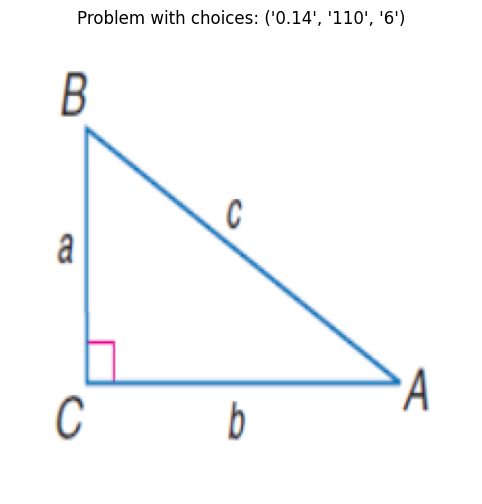


Analyzing text characteristics...


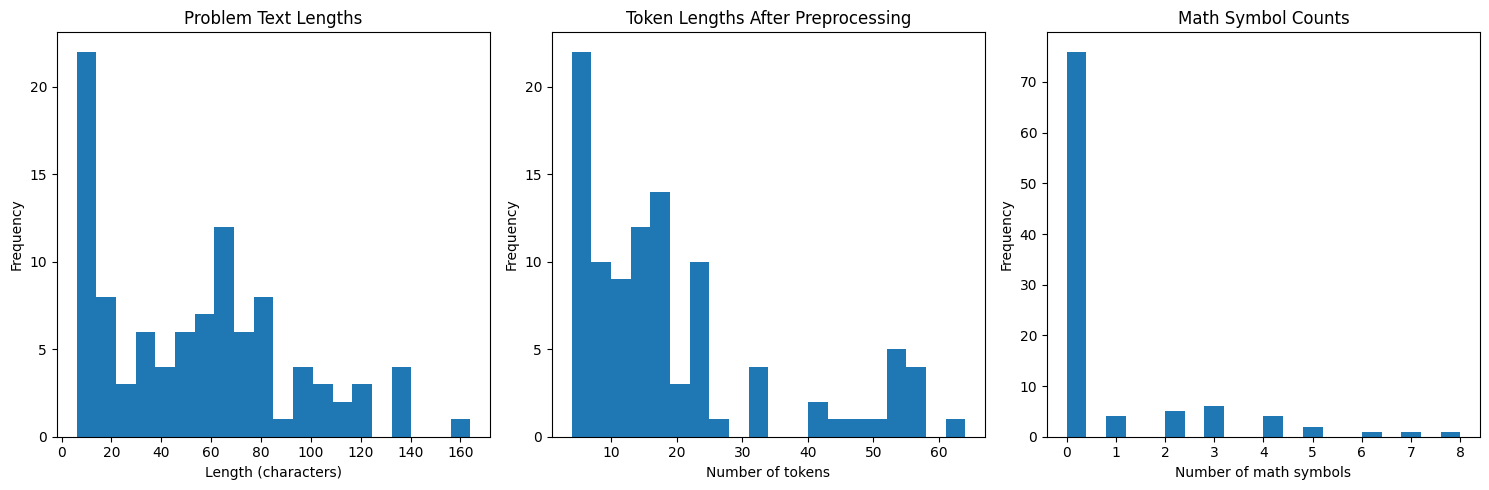

Average text length: 54.39 characters
Average token length: 18.87 tokens
Average math symbols per problem: 0.79

Step 3 (Text Preprocessing) implementation complete!


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

# Create the text preprocessor
text_processor = GeometryTextPreprocessor(max_length=128)

# Optional: Create an OCR processor (placeholder)
ocr_processor = GeometryOCRExtractor(use_math_ocr=True)

# Demonstrate text preprocessing on a few samples
print("Demonstrating text preprocessing:")
demonstrate_text_preprocessing(dataset_splits["train"], text_processor)

# Create enhanced dataset instances with text processing
train_dataset_enhanced = EnhancedGeometryDataset(
    dataset_splits["train"],
    image_processor,
    text_processor,
    use_ocr=False  # Set to True if you want to use OCR
)

val_dataset_enhanced = EnhancedGeometryDataset(
    dataset_splits["validation"],
    image_processor,
    text_processor,
    use_ocr=False
)

# Create data loaders for the enhanced datasets
train_loader_enhanced = DataLoader(
    train_dataset_enhanced,
    batch_size=16,
    shuffle=True,
    num_workers=2
)

val_loader_enhanced = DataLoader(
    val_dataset_enhanced,
    batch_size=16,
    shuffle=False,
    num_workers=2
)

# Test the enhanced data loader
def test_enhanced_data_loader(data_loader):
    """
    Test the enhanced data loader by extracting a batch.
    """
    try:
        # Get a single batch
        for batch in data_loader:
            print("\nEnhanced batch shapes:")
            for key, value in batch.items():
                if isinstance(value, torch.Tensor):
                    print(f"  {key}: {value.shape}")
                elif isinstance(value, list) and value and isinstance(value[0], dict):
                    print(f"  {key}: List of {len(value)} dictionaries")
                elif isinstance(value, list):
                    print(f"  {key}: List of {len(value)} items")
                else:
                    print(f"  {key}: {type(value)}")
            
            # Display one sample in detail
            sample_idx = 0
            print("\nSample details:")
            print(f"ID: {batch['id'][sample_idx].item()}")
            print(f"Raw text: {batch['raw_text'][sample_idx]}")
            print(f"Label: {batch['label'][sample_idx].item()} (Answer option {chr(65 + batch['label'][sample_idx].item())})")
            
            # Show the image
            plt.figure(figsize=(10, 6))
            img = batch['image'][sample_idx].permute(1, 2, 0).numpy()
            img = img * torch.tensor([0.229, 0.224, 0.225]).numpy() + torch.tensor([0.485, 0.456, 0.406]).numpy()
            img = np.clip(img, 0, 1)
            
            plt.imshow(img)
            plt.title(f"Problem with choices: {batch['choices'][sample_idx]}")
            plt.axis('off')
            plt.show()
            
            break
            
    except Exception as e:
        print(f"Error testing enhanced data loader: {str(e)}")

# Test the enhanced train loader with a small batch size
small_train_loader_enhanced = DataLoader(
    train_dataset_enhanced,
    batch_size=3,
    shuffle=True,
    num_workers=0  # Use 0 for debugging
)

print("\nTesting enhanced data loader...")
test_enhanced_data_loader(small_train_loader_enhanced)

# Analyze text data characteristics
def analyze_text_characteristics(dataset, text_processor, num_samples=100):
    """
    Analyze characteristics of the text data after preprocessing.
    """
    text_lengths = []
    token_lengths = []
    math_symbol_counts = []
    
    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]
        if 'problem' in sample:
            # Get the problem text
            problem_text = sample['problem'].replace('<image>', '')
            
            # Calculate text length
            text_lengths.append(len(problem_text))
            
            # Process text and get token length
            processed = text_processor.preprocess(problem_text)
            token_count = (processed['input_ids'] != text_processor.tokenizer.pad_token_id).sum().item()
            token_lengths.append(token_count)
            
            # Count math symbols
            math_symbol_count = sum(1 for char in problem_text if char in text_processor.math_symbols)
            math_symbol_counts.append(math_symbol_count)
    
    # Plot the characteristics
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(text_lengths, bins=20)
    plt.title("Problem Text Lengths")
    plt.xlabel("Length (characters)")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 3, 2)
    plt.hist(token_lengths, bins=20)
    plt.title("Token Lengths After Preprocessing")
    plt.xlabel("Number of tokens")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 3, 3)
    plt.hist(math_symbol_counts, bins=20)
    plt.title("Math Symbol Counts")
    plt.xlabel("Number of math symbols")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    return {
        "avg_text_length": sum(text_lengths) / len(text_lengths),
        "avg_token_length": sum(token_lengths) / len(token_lengths),
        "avg_math_symbols": sum(math_symbol_counts) / len(math_symbol_counts)
    }

# Analyze text characteristics
print("\nAnalyzing text characteristics...")
text_stats = analyze_text_characteristics(dataset_splits["train"], text_processor)
print(f"Average text length: {text_stats['avg_text_length']:.2f} characters")
print(f"Average token length: {text_stats['avg_token_length']:.2f} tokens")
print(f"Average math symbols per problem: {text_stats['avg_math_symbols']:.2f}")

print("\nStep 3 (Text Preprocessing) implementation complete!")

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import AutoModel

class FeatureExtractor(nn.Module):
    def __init__(self, vision_model_name="resnet50", text_model_name="bert-base-uncased", freeze_vision_layers=True):
        """
        Initialize the feature extraction module.
        
        Args:
            vision_model_name (str): Name of the vision model to use
            text_model_name (str): Name of the text model to use
            freeze_vision_layers (bool): Whether to freeze early layers of the vision model
        """
        super(FeatureExtractor, self).__init__()
        
        # Initialize the vision backbone
        if vision_model_name == "resnet50":
            self.vision_model = models.resnet50(pretrained=True)
            # Remove the final classification layer
            self.vision_features_dim = self.vision_model.fc.in_features
            self.vision_model.fc = nn.Identity()
        elif vision_model_name == "vit":
            # Vision Transformer could be used as an alternative
            self.vision_model = models.vit_b_16(pretrained=True)
            self.vision_features_dim = self.vision_model.heads.head.in_features
            self.vision_model.heads.head = nn.Identity()
        else:
            raise ValueError(f"Unsupported vision model: {vision_model_name}")
        
        # Freeze early layers of the vision model if specified
        if freeze_vision_layers:
            # For ResNet, freeze everything except the last few layers
            if vision_model_name == "resnet50":
                for name, param in self.vision_model.named_parameters():
                    if "layer4" not in name:
                        param.requires_grad = False
            # For ViT, freeze the patch embedding and early transformer blocks
            elif vision_model_name == "vit":
                for name, param in self.vision_model.named_parameters():
                    if "blocks.11" not in name and "heads" not in name:
                        param.requires_grad = False
        
        # Initialize the text model (BERT or other transformers)
        self.text_model = AutoModel.from_pretrained(text_model_name)
        self.text_features_dim = self.text_model.config.hidden_size
        
    def extract_vision_features(self, images):
        """
        Extract features from images.
        
        Args:
            images (torch.Tensor): Batch of image tensors [batch_size, channels, height, width]
            
        Returns:
            torch.Tensor: Image features [batch_size, vision_features_dim]
        """
        return self.vision_model(images)
    
    def extract_text_features(self, input_ids, attention_mask):
        """
        Extract features from text.
        
        Args:
            input_ids (torch.Tensor): Token IDs [batch_size, seq_length]
            attention_mask (torch.Tensor): Attention mask [batch_size, seq_length]
            
        Returns:
            torch.Tensor: Text features [batch_size, text_features_dim]
        """
        # Get the outputs from the text model
        outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        
        # Use the [CLS] token representation as the text features
        # This is a common approach for getting a fixed-size representation of variable-length text
        return outputs.last_hidden_state[:, 0, :]

class ModalityFusion(nn.Module):
    def __init__(self, vision_dim, text_dim, fusion_dim=512, num_choices=4, fusion_type="concat"):
        """
        Initialize the modality fusion module.
        
        Args:
            vision_dim (int): Dimension of the vision features
            text_dim (int): Dimension of the text features
            fusion_dim (int): Dimension of the fused features
            num_choices (int): Number of multiple-choice options
            fusion_type (str): Type of fusion to use ('concat', 'attention')
        """
        super(ModalityFusion, self).__init__()
        
        self.fusion_type = fusion_type
        self.num_choices = num_choices
        
        if fusion_type == "concat":
            # Simple concatenation followed by projection
            self.fusion_layer = nn.Sequential(
                nn.Linear(vision_dim + text_dim, fusion_dim),
                nn.ReLU(),
                nn.Dropout(0.2),
                nn.Linear(fusion_dim, fusion_dim)
            )
        elif fusion_type == "attention":
            # Cross-modal attention
            self.vision_projection = nn.Linear(vision_dim, fusion_dim)
            self.text_projection = nn.Linear(text_dim, fusion_dim)
            
            # Attention parameters
            self.query_proj = nn.Linear(fusion_dim, fusion_dim)
            self.key_proj = nn.Linear(fusion_dim, fusion_dim)
            self.value_proj = nn.Linear(fusion_dim, fusion_dim)
            
            self.attention_scale = fusion_dim ** 0.5
            
            # Final projection
            self.output_proj = nn.Linear(fusion_dim * 2, fusion_dim)
        else:
            raise ValueError(f"Unsupported fusion type: {fusion_type}")
        
        # Choice encoder (for encoding each of the multiple-choice options)
        self.choice_encoder = nn.Sequential(
            nn.Linear(text_dim, fusion_dim),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Final classification layer
        self.classifier = nn.Linear(fusion_dim, 1)
    
    def forward(self, vision_features, text_features, choice_features):
        """
        Forward pass through the fusion module.
        
        Args:
            vision_features (torch.Tensor): Image features [batch_size, vision_dim]
            text_features (torch.Tensor): Text features [batch_size, text_dim]
            choice_features (list): List of tensors for each choice [batch_size, text_dim]
            
        Returns:
            torch.Tensor: Logits for each choice [batch_size, num_choices]
        """
        batch_size = vision_features.size(0)
        
        # Fuse vision and text features
        if self.fusion_type == "concat":
            # Simple concatenation
            fused_features = torch.cat([vision_features, text_features], dim=1)
            fused_features = self.fusion_layer(fused_features)
        elif self.fusion_type == "attention":
            # Cross-modal attention
            vision_proj = self.vision_projection(vision_features)
            text_proj = self.text_projection(text_features)
            
            # Vision attending to text
            query_v = self.query_proj(vision_proj)
            key_t = self.key_proj(text_proj)
            value_t = self.value_proj(text_proj)
            
            attention_scores = torch.bmm(query_v.unsqueeze(1), key_t.unsqueeze(2)) / self.attention_scale
            attention_weights = torch.softmax(attention_scores, dim=2)
            attended_text = torch.bmm(attention_weights, value_t.unsqueeze(2)).squeeze(2)
            
            # Concatenate and project
            fused_features = torch.cat([vision_proj, attended_text], dim=1)
            fused_features = self.output_proj(fused_features)
        
        # Process each choice
        choice_logits = []
        for i in range(self.num_choices):
            # Get features for the current choice
            current_choice_features = choice_features[i]
            
            # Encode the choice
            encoded_choice = self.choice_encoder(current_choice_features)
            
            # Combine with fused features (using element-wise multiplication as a simple interaction)
            choice_interaction = fused_features * encoded_choice
            
            # Get logits for this choice
            logit = self.classifier(choice_interaction)
            choice_logits.append(logit)
        
        # Stack the logits for all choices
        return torch.cat(choice_logits, dim=1)

class GeometryMultiModalModel(nn.Module):
    def __init__(self, vision_model_name="resnet50", text_model_name="bert-base-uncased", 
                 fusion_dim=512, num_choices=4, fusion_type="concat", freeze_vision_layers=True):
        """
        Complete multi-modal model for geometry problem-solving.
        
        Args:
            vision_model_name (str): Name of the vision model to use
            text_model_name (str): Name of the text model to use
            fusion_dim (int): Dimension of the fused features
            num_choices (int): Number of multiple-choice options
            fusion_type (str): Type of fusion to use ('concat', 'attention')
            freeze_vision_layers (bool): Whether to freeze early layers of the vision model
        """
        super(GeometryMultiModalModel, self).__init__()
        
        # Feature extraction module
        self.feature_extractor = FeatureExtractor(
            vision_model_name=vision_model_name,
            text_model_name=text_model_name,
            freeze_vision_layers=freeze_vision_layers
        )
        
        # Modality fusion module
        self.fusion_module = ModalityFusion(
            vision_dim=self.feature_extractor.vision_features_dim,
            text_dim=self.feature_extractor.text_features_dim,
            fusion_dim=fusion_dim,
            num_choices=num_choices,
            fusion_type=fusion_type
        )
    
    def forward(self, images, input_ids, attention_mask, choice_input_ids_list, choice_attention_mask_list):
        """
        Forward pass through the complete model.
        
        Args:
            images (torch.Tensor): Batch of image tensors [batch_size, channels, height, width]
            input_ids (torch.Tensor): Token IDs for problem text [batch_size, seq_length]
            attention_mask (torch.Tensor): Attention mask for problem text [batch_size, seq_length]
            choice_input_ids_list (list): List of token IDs for choices [num_choices, batch_size, seq_length]
            choice_attention_mask_list (list): List of attention masks for choices [num_choices, batch_size, seq_length]
            
        Returns:
            torch.Tensor: Logits for each choice [batch_size, num_choices]
        """
        # Extract features
        vision_features = self.feature_extractor.extract_vision_features(images)
        text_features = self.feature_extractor.extract_text_features(input_ids, attention_mask)
        
        # Extract features for each choice
        choice_features = []
        for i in range(len(choice_input_ids_list)):
            choice_feature = self.feature_extractor.extract_text_features(
                choice_input_ids_list[i], 
                choice_attention_mask_list[i]
            )
            choice_features.append(choice_feature)
        
        # Fuse features and get logits
        logits = self.fusion_module(vision_features, text_features, choice_features)
        
        return logits

In [8]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

def prepare_batch_for_model(batch):
    """
    Prepare a batch from the data loader for input to the model.
    
    Args:
        batch (dict): Batch from the data loader
        
    Returns:
        tuple: Tuple of tensors for model input
    """
    images = batch['image']
    text_input_ids = batch['text_input_ids']
    text_attention_mask = batch['text_attention_mask']
    labels = batch['label']
    
    # Extract choice features
    choice_input_ids_list = []
    choice_attention_mask_list = []
    
    for i in range(len(batch['processed_choices'])):
        choice_dict = batch['processed_choices'][i]
        choice_input_ids_list.append(choice_dict['input_ids'])
        choice_attention_mask_list.append(choice_dict['attention_mask'])
    
    return images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels

def train_model(model, train_loader, val_loader, device, num_epochs=5, lr=1e-4):
    """
    Train the model.
    
    Args:
        model (nn.Module): The model to train
        train_loader (DataLoader): DataLoader for training data
        val_loader (DataLoader): DataLoader for validation data
        device (torch.device): Device to use for training
        num_epochs (int): Number of epochs to train for
        lr (float): Learning rate
        
    Returns:
        dict: Training history
    """
    # Move model to device
    model = model.to(device)
    
    # Define optimizer and loss function
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    criterion = CrossEntropyLoss()
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    
    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    # Training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        for batch in train_loop:
            # Prepare batch
            images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels = prepare_batch_for_model(batch)
            
            # Move batch to device
            images = images.to(device)
            text_input_ids = text_input_ids.to(device)
            text_attention_mask = text_attention_mask.to(device)
            choice_input_ids_list = [ids.to(device) for ids in choice_input_ids_list]
            choice_attention_mask_list = [mask.to(device) for mask in choice_attention_mask_list]
            labels = labels.to(device)
            
            # Forward pass
            logits = model(images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list)
            
            # Calculate loss
            loss = criterion(logits, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Update statistics
            train_loss += loss.item()
            _, predicted = torch.max(logits, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
            # Update progress bar
            train_loop.set_postfix(loss=loss.item(), acc=train_correct/train_total)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]")
            for batch in val_loop:
                # Prepare batch
                images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels = prepare_batch_for_model(batch)
                
                # Move batch to device
                images = images.to(device)
                text_input_ids = text_input_ids.to(device)
                text_attention_mask = text_attention_mask.to(device)
                choice_input_ids_list = [ids.to(device) for ids in choice_input_ids_list]
                choice_attention_mask_list = [mask.to(device) for mask in choice_attention_mask_list]
                labels = labels.to(device)
                
                # Forward pass
                logits = model(images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list)
                
                # Calculate loss
                loss = criterion(logits, labels)
                
                # Update statistics
                val_loss += loss.item()
                _, predicted = torch.max(logits, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
                # Update progress bar
                val_loop.set_postfix(loss=loss.item(), acc=val_correct/val_total)
        
        # Update learning rate
        scheduler.step()
        
        # Calculate epoch metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_train_acc = train_correct / train_total
        epoch_val_acc = val_correct / val_total
        
        # Update history
        history['train_loss'].append(epoch_train_loss)
        history['val_loss'].append(epoch_val_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_acc'].append(epoch_val_acc)
        
        # Print epoch summary
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}")
        print(f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")
    
    return history

def evaluate_model(model, test_loader, device):
    """
    Evaluate the model on the test set.
    
    Args:
        model (nn.Module): The model to evaluate
        test_loader (DataLoader): DataLoader for test data
        device (torch.device): Device to use for evaluation
        
    Returns:
        float: Test accuracy
    """
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        test_loop = tqdm(test_loader, desc="Evaluating")
        for batch in test_loop:
            # Prepare batch
            images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels = prepare_batch_for_model(batch)
            
            # Move batch to device
            images = images.to(device)
            text_input_ids = text_input_ids.to(device)
            text_attention_mask = text_attention_mask.to(device)
            choice_input_ids_list = [ids.to(device) for ids in choice_input_ids_list]
            choice_attention_mask_list = [mask.to(device) for mask in choice_attention_mask_list]
            labels = labels.to(device)
            
            # Forward pass
            logits = model(images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list)
            
            # Update statistics
            _, predicted = torch.max(logits, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            
            # Update progress bar
            test_loop.set_postfix(acc=test_correct/test_total)
    
    test_acc = test_correct / test_total
    print(f"Test Accuracy: {test_acc:.4f}")
    
    return test_acc

In [9]:
# Function to visualize model architecture
def visualize_model_architecture():
    """
    Visualize the architecture of the model.
    """
    # Create a small instance of the model for visualization
    model = GeometryMultiModalModel(
        vision_model_name="resnet50",
        text_model_name="bert-base-uncased",
        fusion_dim=512,
        num_choices=4,
        fusion_type="concat"
    )
    
    # Print model summary
    print("Model Architecture:")
    print(model)
    
    # Count total parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Percentage of Trainable Parameters: {trainable_params/total_params*100:.2f}%")
    
    # Return the model
    return model

# Initialize and visualize the model
sample_model = visualize_model_architecture()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 200MB/s] 


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Model Architecture:
GeometryMultiModalModel(
  (feature_extractor): FeatureExtractor(
    (vision_model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tru

In [10]:
# Test feature extraction and fusion
def test_feature_extraction_fusion(train_loader_enhanced, model):
    """
    Test the feature extraction and fusion components with a sample batch.
    
    Args:
        train_loader_enhanced: DataLoader with enhanced preprocessing
        model: The model to test
    """
    # Get a batch
    for batch in train_loader_enhanced:
        break
    
    # Prepare batch
    images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels = prepare_batch_for_model(batch)
    
    # Extract features
    print("\nTesting Feature Extraction:")
    
    # Vision features
    vision_features = model.feature_extractor.extract_vision_features(images)
    print(f"Vision Features Shape: {vision_features.shape}")
    
    # Text features
    text_features = model.feature_extractor.extract_text_features(text_input_ids, text_attention_mask)
    print(f"Text Features Shape: {text_features.shape}")
    
    # Choice features
    choice_features = []
    for i in range(len(choice_input_ids_list)):
        choice_feature = model.feature_extractor.extract_text_features(
            choice_input_ids_list[i], 
            choice_attention_mask_list[i]
        )
        choice_features.append(choice_feature)
        print(f"Choice {i+1} Features Shape: {choice_feature.shape}")
    
    # Test fusion
    print("\nTesting Modality Fusion:")
    logits = model.fusion_module(vision_features, text_features, choice_features)
    print(f"Fusion Output (Logits) Shape: {logits.shape}")
    
    # Test full model
    print("\nTesting Full Model:")
    full_logits = model(images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list)
    print(f"Full Model Output Shape: {full_logits.shape}")
    
    return vision_features, text_features, choice_features, logits

# Create a small instance of the model for testing
small_model = GeometryMultiModalModel(
    vision_model_name="resnet50",
    text_model_name="bert-base-uncased",
    fusion_dim=512,
    num_choices=4,
    fusion_type="concat"
)

# Test with a small batch size
small_train_loader = DataLoader(
    train_dataset_enhanced,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

# Run the test
vision_features, text_features, choice_features, logits = test_feature_extraction_fusion(small_train_loader, small_model)

# Full workflow to train and evaluate the model
def full_workflow(train_dataset_enhanced, val_dataset_enhanced, test_dataset_enhanced, batch_size=16, num_epochs=5):
    """
    Full workflow to train and evaluate the model.
    
    Args:
        train_dataset_enhanced: Enhanced training dataset
        val_dataset_enhanced: Enhanced validation dataset
        test_dataset_enhanced: Enhanced test dataset
        batch_size (int): Batch size
        num_epochs (int): Number of epochs
        
    Returns:
        tuple: (trained model, history, test accuracy)
    """
    # Create data loaders
    train_loader = DataLoader(train_dataset_enhanced, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset_enhanced, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset_enhanced, batch_size=batch_size, shuffle=False, num_workers=2)
    
    # Initialize model
    model = GeometryMultiModalModel(
        vision_model_name="resnet50",
        text_model_name="bert-base-uncased",
        fusion_dim=512,
        num_choices=4,
        fusion_type="concat",
        freeze_vision_layers=True
    )
    
    # Determine device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Train model
    history = train_model(model, train_loader, val_loader, device, num_epochs=num_epochs, lr=1e-4)
    
    # Evaluate model
    test_acc = evaluate_model(model, test_loader, device)
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return model, history, test_acc

print("\nFeature Extraction & Modality Fusion implementation complete!")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Testing Feature Extraction:
Vision Features Shape: torch.Size([2, 2048])
Text Features Shape: torch.Size([2, 768])
Choice 1 Features Shape: torch.Size([2, 768])
Choice 2 Features Shape: torch.Size([2, 768])
Choice 3 Features Shape: torch.Size([2, 768])
Choice 4 Features Shape: torch.Size([2, 768])

Testing Modality Fusion:
Fusion Output (Logits) Shape: torch.Size([2, 4])

Testing Full Model:
Full Model Output Shape: torch.Size([2, 4])

Feature Extraction & Modality Fusion implementation complete!


In [11]:
def visualize_model_predictions(model, data_loader, device, num_samples=5):
    """
    Visualize model predictions and attention maps.
    
    Args:
        model (nn.Module): The trained model
        data_loader (DataLoader): DataLoader for visualization
        device (torch.device): Device to use
        num_samples (int): Number of samples to visualize
    """
    model.eval()
    
    sample_count = 0
    with torch.no_grad():
        for batch in data_loader:
            if sample_count >= num_samples:
                break
            
            # Prepare batch
            images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list, labels = prepare_batch_for_model(batch)
            
            # Move batch to device
            images = images.to(device)
            text_input_ids = text_input_ids.to(device)
            text_attention_mask = text_attention_mask.to(device)
            choice_input_ids_list = [ids.to(device) for ids in choice_input_ids_list]
            choice_attention_mask_list = [mask.to(device) for mask in choice_attention_mask_list]
            labels = labels.to(device)
            
            # Forward pass
            logits = model(images, text_input_ids, text_attention_mask, choice_input_ids_list, choice_attention_mask_list)
            
            # Get predictions
            _, predicted = torch.max(logits, 1)
            
            # Visualize each sample in the batch
            for i in range(min(len(images), num_samples - sample_count)):
                plt.figure(figsize=(10, 8))
                
                # Display the image
                img = images[i].cpu().permute(1, 2, 0).numpy()
                img = img * torch.tensor([0.229, 0.224, 0.225]).numpy() + torch.tensor([0.485, 0.456, 0.406]).numpy()
                img = np.clip(img, 0, 1)
                
                plt.imshow(img)
                
                # Get problem text and choices
                problem_text = batch['raw_text'][i]
                choices = batch['choices']
                
                # Get probabilities
                probs = torch.softmax(logits[i], dim=0).cpu().numpy()
                
                # Create title with predictions
                title = f"Problem: {problem_text[:50]}...\n"
                title += f"Predicted: {chr(65 + predicted[i].item())} ({probs[predicted[i].item()]:.2f}), "
                title += f"Actual: {chr(65 + labels[i].item())}"
                
                plt.title(title, fontsize=10)
                
                # Add choice probabilities
                choice_text = ""
                for j in range(len(choices)):
                    choice = choices[j][i] if i < len(choices[j]) else "N/A"
                    choice_text += f"{chr(65+j)}: {choice} ({probs[j]:.2f})\n"
                
                plt.figtext(0.5, 0.01, choice_text, ha="center", fontsize=10, 
                           bbox={"facecolor":"orange", "alpha":0.3, "pad":5})
                
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
                sample_count += 1
                if sample_count >= num_samples:
                    break

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# -----------------------------------------------------------------------------
# 1. Mathematical Reasoning Module
# -----------------------------------------------------------------------------
class MathReasoningModule(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        """
        A reasoning module that takes a combined representation (from the fused
        question features and an encoded answer choice) and produces a single logit.
        
        Args:
            input_dim (int): Dimensionality of the fused representation.
            hidden_dim (int): Number of hidden units.
        """
        super(MathReasoningModule, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, fused_representation):
        """
        Forward pass of the reasoning module.
        
        Args:
            fused_representation (torch.Tensor): Combined representation for a given choice,
                typically obtained by element-wise interacting the question features and the 
                encoded choice features. Shape: [batch_size, input_dim]
        
        Returns:
            torch.Tensor: Logit score for that answer option [batch_size, 1]
        """
        x = self.fc1(fused_representation)
        x = F.relu(x)
        x = self.dropout(x)
        logit = self.fc2(x)
        return logit


# -----------------------------------------------------------------------------
# 2. Integrated Multi-Modal Reasoning Model
# -----------------------------------------------------------------------------
class GeometryMultiModalReasoningModel(nn.Module):
    def __init__(self, vision_model_name="resnet50", text_model_name="bert-base-uncased", 
                 fusion_dim=512, reasoning_hidden_dim=256, num_choices=4, fusion_type="concat",
                 freeze_vision_layers=True):
        """
        Complete multi-modal model for geometry problem solving with an additional
        mathematical reasoning module. This model reuses your step 4 FeatureExtractor,
        and ModalityFusion (choice encoding) but now decouples the classification head into
        a separate reasoning module.
        
        Args:
            vision_model_name (str): Name of the vision model.
            text_model_name (str): Name of the text model.
            fusion_dim (int): Dimension of the fused features from image and text.
            reasoning_hidden_dim (int): Hidden dimension for the reasoning module.
            num_choices (int): Number of answer options.
            fusion_type (str): Fusion type, e.g. 'concat' (this is used inside your FeatureExtractor and Fusion module).
            freeze_vision_layers (bool): Whether to freeze early vision layers.
        """
        super(GeometryMultiModalReasoningModel, self).__init__()
        
        # Use your pre-existing feature extraction module.
        from transformers import AutoModel
        import torchvision.models as models

        # Here we assume your FeatureExtractor implementation is accessible as before.
        self.feature_extractor = FeatureExtractor(
            vision_model_name=vision_model_name,
            text_model_name=text_model_name,
            freeze_vision_layers=freeze_vision_layers
        )
        
        # Fusion for the main problem: combine vision and problem text into "question features".
        # In your step 4, you used a fusion module that encoded the answer choices as well.
        # Here, we re-use the choice encoder (from your ModalityFusion) to encode the choices.
        # We assume that your feature extractor provides:
        #   - vision_features of shape [batch_size, vision_features_dim]
        #   - text_features of shape [batch_size, text_features_dim]
        #
        # To produce fused question features, we simply concatenate the vision and text features
        # and project them to fusion_dim.
        self.question_fusion = nn.Sequential(
            nn.Linear(self.feature_extractor.vision_features_dim + self.feature_extractor.text_features_dim, fusion_dim),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Choice encoder: similar to your previous implementation; it encodes the textual representation of a choice.
        self.choice_encoder = nn.Sequential(
            nn.Linear(self.feature_extractor.text_features_dim, fusion_dim),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Mathematical reasoning module: It will be applied for each answer option.
        # We first combine the fused question features and the encoded choice features by element-wise multiplication.
        # The resulting vector (of size fusion_dim) is processed by the reasoning module.
        self.reasoning_module = MathReasoningModule(input_dim=fusion_dim, hidden_dim=reasoning_hidden_dim)
        self.num_choices = num_choices

    def forward(self, images, input_ids, attention_mask, choice_input_ids_list, choice_attention_mask_list):
        """
        Forward pass through the complete multi-modal reasoning model.
        
        Args:
            images (torch.Tensor): [batch_size, channels, height, width]
            input_ids (torch.Tensor): Token IDs for problem text [batch_size, seq_length]
            attention_mask (torch.Tensor): Attention mask for problem text [batch_size, seq_length]
            choice_input_ids_list (list): List of tensors for each choice's token IDs [num_choices, batch_size, seq_length]
            choice_attention_mask_list (list): List of attention masks for each choice [num_choices, batch_size, seq_length]
        
        Returns:
            torch.Tensor: Logits for each choice [batch_size, num_choices]
        """
        # Extract visual and textual features from the problem image and text.
        vision_features = self.feature_extractor.extract_vision_features(images)
        text_features = self.feature_extractor.extract_text_features(input_ids, attention_mask)
        
        # Fuse question features (from image and text).
        # Shape: [batch_size, vision_features_dim + text_features_dim] -> [batch_size, fusion_dim]
        question_cat = torch.cat([vision_features, text_features], dim=1)
        question_features = self.question_fusion(question_cat)
        
        # Process each answer choice: encode choice text via the same text feature extractor and pass it through choice_encoder.
        logits_list = []
        for i in range(self.num_choices):
            # Extract choice features using your FeatureExtractor’s text model.
            choice_text_features = self.feature_extractor.extract_text_features(
                choice_input_ids_list[i], 
                choice_attention_mask_list[i]
            )
            # Encode the choice
            encoded_choice = self.choice_encoder(choice_text_features)
            
            # Combine question features and encoded choice.
            # Here we use element-wise multiplication as the interaction (you can experiment with other interactions).
            fused_for_reasoning = question_features * encoded_choice
            
            # Pass through the mathematical reasoning module for this choice.
            logit = self.reasoning_module(fused_for_reasoning)  # Shape: [batch_size, 1]
            logits_list.append(logit)
        
        # Concatenate all logits along the choice dimension.
        logits = torch.cat(logits_list, dim=1)  # Final shape: [batch_size, num_choices]
        return logits
